### import

In [2]:
import json
import csv
import pandas as pd
import networkx as nx
import math
from matplotlib import pylab
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import community as community_louvain
import matplotlib.cm as cm
from textblob import TextBlob, Word, Blobber

### single instance example from raw data

In [297]:
# {
#     "attachment":{
#         "type":null,
#         "value":null
#     },
#     "body":"\u041e\u0431\u0435\u0449\u0430\u044e \u0437\u0430\u0431\u043e\u0442\u0438\u0442\u044c\u0441\u044f \u043e \u0442\u0435\u0445, \u043a\u0442\u043e \u0432\u0430\u0436\u0435\u043d \u0434\u043b\u044f \u043c\u0435\u043d\u044f. #\u0412\u041d\u043e\u0432\u043e\u043c\u0413\u043e\u0434\u0443\u042f\u041e\u0431\u0435\u0449\u0430\u044e",
#     "body_html":null,
#     "body_html_summary":null,
#     "body_html_summary_truncated":false,
#     "category":null,
#     "category_details":null,
#     "conversation_parent_id":null,
#     "created_at":"2017-01-01T00:00:01+00:00",
#     "created_utc":1483228801,
#     "dislike_count":0,
#     "edited":false,
#     "embed":{
#         "html":null,
#         "iframe":null
#     },
#     "id":3489400,
#     "is_locked":false,
#     "is_premium":false,
#     "is_quote":false,
#     "is_replies_disabled":false,
#     "is_reply":false,
#     "language":null,
#     "like_count":0,
#     "nsfw":false,
#     "only_emoji":false,
#     "parent_id":null,
#     "quote_conversation_parent_id":null,
#     "reply_count":0,
#     "repost_count":0,
#     "retrieved_utc":1518257233,
#     "revised_at":null,
#     "revised_utc":null,
#     "score":0,
#     "user":{
#         "id":65574,
#         "is_donor":false,
#         "is_investor":false,
#         "is_premium":false,
#         "is_private":false,
#         "is_pro":false,
#         "name":"Dimitri Vladimirovich Metkov",
#         "picture_url":"https://files.gab.ai/user/5835734e4d7dc.jpg",
#         "username":"dima_metkov",
#         "verified":false
#     }
# }

### step 1: data (raw to .json)

In [3]:
list_file_input_raw = [
    'datasets/GABPOSTS_2017-01', 'datasets/GABPOSTS_2017-02', 'datasets/GABPOSTS_2017-03',
    'datasets/GABPOSTS_2017-04', 'datasets/GABPOSTS_2017-05', 'datasets/GABPOSTS_2017-06'
]
file_output_raw_name = "datasets/gab_2017_from_01_to_06.json"
# list_file_input_raw = ['datasets/GABPOSTS_2017-01']
# file_output_raw_name = "datasets/gab_2017_01.json"
list_post = []
for fir in list_file_input_raw:
    print(len(list_post))
    for line in open(fir, 'r'):
        list_post.append(json.loads(line))  
file_output_raw = open(file_output_raw_name, "w")
json.dump(list_post, file_output_raw)
file_output_raw.close()

### step 2: data flattening and filter (.json to python object)

In [5]:
# file_output_raw = open("datasets/gab_2017_01.json", "r")
file_output_raw = open("datasets/gab_2017_from_01_to_06.json", "r")
list_post= json.load(file_output_raw)
list_flat_post = []
c=0
for p in list_post:
    c+=1
    if c%100000==0:
        print(c/100000)
    e = {}
    e['id'] = p['id'] if 'id' in p.keys() else ''
    e['parent_id'] = p['parent_id'] if 'parent_id' in p.keys() else ''
    e['user__id'] = p['user']['id'] if 'user' in p.keys() and 'id' in p['user'].keys() else ''

    e['body'] = p['body'] if 'body' in p.keys() else ''    
    e['category_details__title'] = p['category_details']['title'] if 'category_details' in p.keys() \
        and p['category_details'] and 'title' in p['category_details'].keys() else ''
    e['category_details__value'] = p['category_details']['value'] if 'category_details' in p.keys() \
        and p['category_details'] and 'value' in p['category_details'].keys() else ''

    e['like_count'] = p['like_count'] if 'like_count' in p.keys() else '' 
    e['dislike_count'] = p['dislike_count'] if 'dislike_count' in p.keys() else '' 
    e['reply_count'] = p['reply_count'] if 'reply_count' in p.keys() else '' 
    e['repost_count'] = p['repost_count'] if 'repost_count' in p.keys() else '' 
    e['is_quote'] = p['is_quote'] if 'is_quote' in p.keys() else '' 
    e['is_reply'] = p['is_reply'] if 'is_reply' in p.keys() else '' 

    e['created_at'] = p['created_at'] if 'created_at' in p.keys() else '' 
    e['created_utc'] = p['created_utc'] if 'created_utc' in p.keys() else '' 
    e['edited'] = p['edited'] if 'edited' in p.keys() else '' 

#     e['attachment__type'] = p['attachment']['type']
#     e['attachment__value'] = p['attachment']['value']    
#     e['body_html'] = p['body_html']
#     e['body_html_summary'] = p['body_html_summary']
#     e['body_html_summary_truncated'] = p['body_html_summary_truncated']
#     e['category'] = p['category']
#     e['category_details__emoji'] = p['category_details']['emoji']
#     e['category_details__slug'] = p['category_details']['slug']
#     e['conversation_parent_id'] = p['conversation_parent_id']
#     e['embed__html'] = p['embed']['html']
#     e['embed__iframe'] = p['embed']['iframe']    
#     e['is_locked'] = p['is_locked']
#     e['is_premium'] = p['is_premium']
#     e['is_replies_disabled'] = p['is_replies_disabled']
#     e['language'] = p['language']
#     e['nsfw'] = p['nsfw']
#     e['only_emoji'] = p['only_emoji']
#     e['quote_conversation_parent_id'] = p['quote_conversation_parent_id']
#     e['retrieved_utc'] = p['retrieved_utc']
#     e['revised_at'] = p['revised_at']
#     e['revised_utc'] = p['revised_utc']
#     e['score'] = p['score']
#     e['user__is_donor'] = p['user']['is_donor']
#     e['user__is_investor'] = p['user']['is_investor']
#     e['user__is_premium'] = p['user']['is_premium']
#     e['user__is_private'] = p['user']['is_private']
#     e['user__is_pro'] = p['user']['is_pro']
#     e['user__picture_url'] = p['user']['picture_url']
#     e['user__username'] = p['user']['username']
#     e['user__name'] = p['user']['name']
#     e['user__verified'] = p['user']['verified']

    list_flat_post.append(e)

### step 3: flattened and filtered data to csv (python object to .csv)

In [4]:
csv_columns = list(list_flat_post[0].keys())
csv_file = "datasets/gab_2017_from_01_to_06.csv"
try:
    with open(csv_file, 'w', encoding="utf-8", newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        c=0
        for fp in list_flat_post:
            writer.writerow(fp)
            c+=1
            if c%100000==0:
                print(c/100000)
except Exception as e:
    print(e)

### step 4: large network generation 

In [3]:
df=pd.read_csv('datasets/gab_2017_from_01_to_06.csv', sep=',', header=0) 
m=df.values

In [4]:
m.shape

(4593783, 15)

In [5]:
## 4,593,783 post with each having 15 info
## folowing is a sample of 1 csv row

# id, parent_id, user_id, body,
# category_details_title, category_details_value,
# like_count, dislike_count, reply_count, repost_count,
# is_quote, is_reply
# created_at, created_utc, edited

# print(m[0])
# array([

# 3489400, nan, 65574, 'Обещаю заботиться о тех, кто важен для меня. #ВНовомГодуЯОбещаю',
# nan, nan, 
# 0, 0, 0, 0, 
# False, False, 
# '2017-01-01T00:00:01+00:00', 1483228801, False

#], dtype=object)

In [6]:
### dict_post_info -> each value of the outer dict has 2 elements (k,v)
# {
#     '<post_id>' : {
#         'parent_id' : '<parent_id>',
#         'user_id' : '<user_id>'
#     }
# }

dict_post_info = {}
for r in range(m.shape[0]):
    _id = m[r][0]
    _parent_id = m[r][1] if m[r][1] else ''
    _user_id = m[r][2] if m[r][2] else ''
    dict_post_info[_id] = {
        'parent_id': _parent_id,
        'user_id': _user_id
    }

In [7]:
### dict_user_info -> each value of the outer dict has variable number of elements depending on the number of parents of the key
# {
#     '<user_id>' : {
#         '<parent_id>' : '<weight to this parent>',
#         '<.........>' : '<.......>'
#     }
# }

dict_user_info = {}
for k,v in dict_post_info.items():
    if v['user_id'] not in dict_user_info.keys():
        dict_user_info[v['user_id']] = {}
    if not math.isnan(v['parent_id']) and v['parent_id'] in dict_post_info.keys():
        parent_user_id = dict_post_info[v['parent_id']]['user_id']
        parent_user_id_value = 1
        
        if parent_user_id in dict_user_info[v['user_id']].keys():
            parent_user_id_value = dict_user_info[v['user_id']][parent_user_id] + 1
        
        dict_user_info[v['user_id']][parent_user_id] = parent_user_id_value

In [8]:
# count=0
# for k,v in dict_user_info.items():
#     if count==5:
#         break
#     print(k,v)
#     print()
#     count+=1

In [9]:
### node(s),edge(t, weight) := (child user -> parent user) 
list_node = list(dict_user_info.keys())
list_edge = []
for k,v in dict_user_info.items():
    if len(v.items()) > 0:
        for k1,v1 in v.items():
            edge = (k,k1,v1)
            list_edge.append(edge)

In [10]:
### DiGraph formation
G = nx.DiGraph()
G.add_nodes_from(list_node)
G.add_weighted_edges_from(list_edge)

In [11]:
len(list_node), len(list_edge)

(44018, 625291)

### step 5: analysis of weakly connected components 
#### (form lwcc1, lwcc2)

In [12]:
wcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

In [13]:
len(wcc)

16740

In [14]:
lwcc1, lwcc2 = None, None

list_top_len_nodes = []
list_top_len_edges = []
c=0
for e in wcc:
    if c==50:
        break
    cc=G.subgraph(e)
    if c==0:
        lwcc1 = cc
    elif c==1:
        lwcc2 = cc
    else:
        pass
    list_top_len_nodes.append(cc.number_of_nodes())
    list_top_len_edges.append(cc.number_of_edges())
    c+=1
#     if c==5:
#         nx.draw(cc)

In [15]:
print(list_top_len_nodes)
print(list_top_len_edges)

[27083, 20, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[624690, 30, 10, 6, 3, 3, 5, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1]


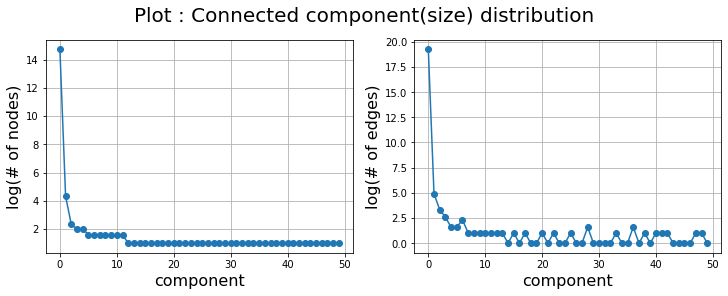

In [16]:
fig1 = plt.figure(constrained_layout=True, figsize=(10,4))
spec1 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig1)
ax1 = fig1.add_subplot(spec1[0, 0])
ax2 = fig1.add_subplot(spec1[0, 1])
ax1.grid(True)
ax2.grid(True)
exp_title = 'Plot : Connected component(size) distribution'
fig1.suptitle(exp_title, fontsize=20)
ax1.plot([i for i in range(0,50,1)], [math.log(e,2) for e in list_top_len_nodes], 'o-')
ax2.plot([i for i in range(0,50,1)], [math.log(e,2) for e in list_top_len_edges], 'o-')
ax1.set_xlabel('component', fontsize=16)
ax1.set_ylabel('log(# of nodes)', fontsize=16)
ax2.set_xlabel('component', fontsize=16)
ax2.set_ylabel('log(# of edges)', fontsize=16)
plt.savefig('skewed_1.png')

## subclustering the large network
### step 6: analysis of lwcc2 with louvain and girvan

In [17]:
lwcc1=G.subgraph(wcc[0])
lwcc2=G.subgraph(wcc[1])

In [18]:
# print(wcc[1])
# print(lwcc2.nodes())

In [19]:
print(lwcc1.number_of_nodes(), lwcc1.number_of_edges())
print(lwcc2.number_of_nodes(), lwcc2.number_of_edges())

27083 624690
20 30


In [20]:
### clustering coeff
# print(nx.average_clustering(lwcc1))

In [21]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

def girvan_newman(graph, ncc=2):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

#     while(sg_count == 1):
    while(sg_count < ncc):
        e0=edge_to_remove(graph)[0]
        e1=edge_to_remove(graph)[1]
#         print(e0)
#         print(e1)
        graph.remove_edge(e0, e1)
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [22]:
# ### DEMO : drawing graph with edge weight
# import matplotlib.pyplot as plt
# pos=nx.spring_layout(lwcc2) # pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw_networkx(lwcc2,pos)
# labels = nx.get_edge_attributes(lwcc2,'weight')
# nx.draw_networkx_edge_labels(lwcc2,pos,edge_labels=labels)

In [23]:
# ### DEMO : louvain partiioning
# G = nx.karate_club_graph()
# partition = community_louvain.best_partition(G)
# print(partition)
# #draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(
#     G, pos, partition.keys(), 
#     node_size=40,cmap=cmap, node_color=list(partition.values())
# )
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [24]:
# ### DEMO : draw network with larger figure
# import matplotlib.pyplot as plt
# import networkx as nx
# G = nx.cycle_graph(80)
# pos = nx.circular_layout(G)
# # default
# plt.figure(1)
# nx.draw(G,pos)
# # smaller nodes and fonts
# plt.figure(2)
# nx.draw(G,pos,node_size=60,font_size=8) 
# # larger figure size
# plt.figure(3,figsize=(12,12)) 
# nx.draw(G,pos)
# plt.show()

In [25]:
lwcc1_u = lwcc1.to_undirected()
lwcc2_u = lwcc2.to_undirected()

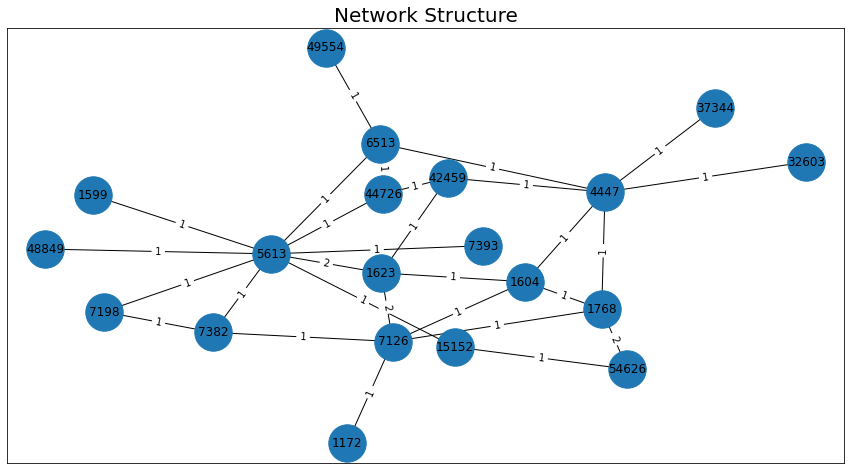

In [36]:
### drawing graph with edge weight on lwcc2
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,8)) 
plt.title('Network Structure', fontsize=20)
pos=nx.spring_layout(lwcc2_u) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(lwcc2_u,pos,node_size=1400)
labels = nx.get_edge_attributes(lwcc2_u,'weight')
nx.draw_networkx_edge_labels(lwcc2_u,pos,edge_labels=labels)
plt.savefig('lwcc2_overall.png')
plt.show()

In [37]:
### louvain partiioning on lwcc2
partition = community_louvain.best_partition(lwcc2_u)
list_index_subclusters=[]
for k,v in partition.items():
    if v not in list_index_subclusters:
        list_index_subclusters.append(v)
print(len(list_index_subclusters))

4


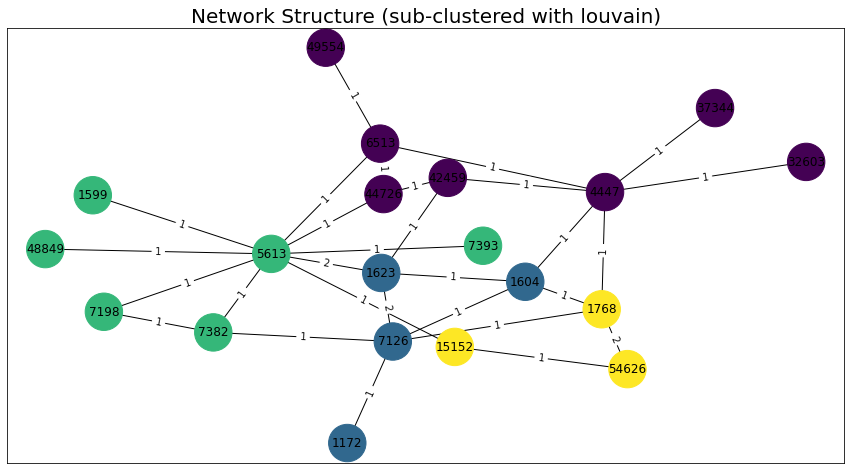

In [38]:
#draw the graph
plt.figure(2,figsize=(15,8)) 
plt.title('Network Structure (sub-clustered with louvain)', fontsize=20)
# pos = nx.spring_layout(lwcc2_u)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(
#     lwcc2_u, pos, partition.keys(), node_size=1400, cmap=cmap, node_color=list(partition.values())
# )
# nx.draw_networkx_edges(lwcc2_u, pos, alpha=0.95)
# plt.show()

nx.draw_networkx(lwcc2_u,pos,partition.keys(),node_size=1400, cmap=cmap, node_color=list(partition.values()))
labels = nx.get_edge_attributes(lwcc2_u,'weight')
nx.draw_networkx_edge_labels(lwcc2_u,pos,edge_labels=labels,alpha=0.95)
plt.savefig('lwcc2_louvain.png')
plt.show()

In [39]:
# ### girvan partiioning on lwcc2
c = girvan_newman(lwcc2_u.copy(), ncc=4)

# find the nodes forming the communities
node_groups = []
for i in c:
    node_groups.append(list(i))

partition = {}    
for i in range(len(node_groups)):
    for j in node_groups[i]:
        partition[j] = i 

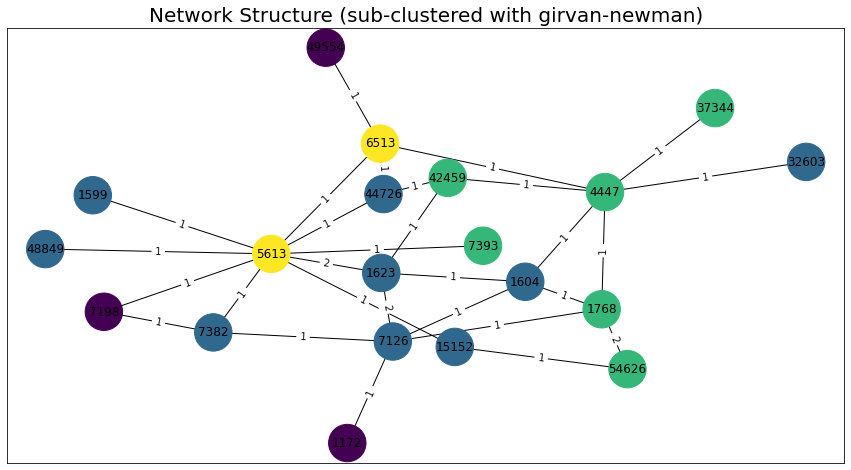

In [40]:
#draw the graph
plt.figure(3,figsize=(15,8)) 
plt.title('Network Structure (sub-clustered with girvan-newman)', fontsize=20)
# pos = nx.spring_layout(lwcc2_u)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(
#     lwcc2_u, pos, partition.keys(), node_size=1400, cmap=cmap, node_color=list(partition.values())
# )
# nx.draw_networkx_edges(lwcc2_u, pos, alpha=0.95)
# plt.show()

nx.draw_networkx(lwcc2_u,pos,partition.keys(),node_size=1400, cmap=cmap, node_color=list(partition.values()))
labels = nx.get_edge_attributes(lwcc2_u,'weight')
nx.draw_networkx_edge_labels(lwcc2_u,pos,edge_labels=labels,alpha=0.95)
plt.savefig('lwcc2_girvan.png')
plt.show()

## subclustering the large network
#### step 7: subclustering lwcc1 with louvain -> select largest 5 subclusters for each get the user_id list (node_list)

In [41]:
### louvain partiioning on lwcc1 
# subclusters : 
# {
#     '<cluster_id>' : '[<list_of_user_id in that cluster>]'
# }

partition = community_louvain.best_partition(lwcc1_u)

In [42]:
community_louvain.modularity(partition,lwcc1_u)

0.26278428737339077

In [43]:
subclusters = {}
for k,v in partition.items():
    if v not in subclusters:
        subclusters[v] = []
    subclusters[v].append(k)

In [44]:
dict_subcluster_no_vs_size={}
for k,v in subclusters.items():
    dict_subcluster_no_vs_size[k] = len(v)

In [45]:
# dict_subcluster_no_vs_size

In [46]:
top_5_subclusters = sorted(dict_subcluster_no_vs_size, key=lambda k: dict_subcluster_no_vs_size[k], reverse=True)[0:5]

In [47]:
print(top_5_subclusters)
for index in top_5_subclusters:
    print(len(subclusters[index]))

[0, 1, 6, 8, 9]
5162
4563
4489
3267
2114


In [48]:
# index_chosen_subclusters = top_5_subclusters
# chosen_partition = {}
# for k,v in partition.items():
#     if v in index_chosen_subclusters:
#         chosen_partition[k] = v

In [49]:
# create list of 5 clusters( where each cluster is a list of node) := list of list

In [50]:
list_top_5_subclusters = []
for index in top_5_subclusters:
    list_top_5_subclusters.append(subclusters[index])

In [51]:
for e in list_top_5_subclusters:
    print(len(e))

5162
4563
4489
3267
2114


In [52]:
# list_top_5_subclusters[-1]

## subclustering the large network
#### step 8: generate csv for each of these 5 clusters with property 
#### (user_id -> indeg, outdeg, clustering coeff, bet centrality, avg. like count, avg. dislike count, avg. reply count, avg. repost count, avg. post polarity)

In [53]:
dict_user_id_vs_feature_info = {}

In [54]:
# empty dict

In [55]:
list_all_user_id = list(dict_user_info.keys())
for user_id in list_all_user_id:
    dict_user_id_vs_feature_info[user_id] = {
        'indeg': 0,
        'outdeg': 0,
        'clustering_coeff': 0,
        'bet_centrality': 0,
        
        'avg_like_count': 0,
        'avg_dislike_count': 0,
        'avg_reply_count': 0,
        'avg_repost_count': 0,
        'avg_post_polarity': 0,
        
        'list_like_count': [],
        'list_dislike_count': [],
        'list_reply_count': [],
        'list_repost_count': [],
        'list_body': [],
        'list_post_polarity': [],
    }

In [56]:
# list := like, dislike, reply, repost, body

In [57]:
c=0
for r in range(m.shape[0]):
    _user_id = m[r][2] if m[r][2] else ''    
    _like_count = m[r][6] if m[r][6] else 0  
    _dislike_count = m[r][7] if m[r][7] else 0
    _reply_count = m[r][8] if m[r][8] else 0
    _repost_count = m[r][9] if m[r][9] else 0
    _body = str(m[r][3]) if m[r][3] else ''
    dict_user_id_vs_feature_info[_user_id]['list_like_count'].append(_like_count)
    dict_user_id_vs_feature_info[_user_id]['list_dislike_count'].append(_dislike_count)
    dict_user_id_vs_feature_info[_user_id]['list_reply_count'].append(_reply_count)
    dict_user_id_vs_feature_info[_user_id]['list_repost_count'].append(_repost_count)
    dict_user_id_vs_feature_info[_user_id]['list_body'].append(_body)
    
    c+=1
    if c%1000000==0:
        print(c)
    

1000000
2000000
3000000
4000000


In [58]:
# list := polarity

In [59]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    _list_body = v['list_body']
    _list_post_polarity = [TextBlob(_body).sentiment[0] for _body in _list_body]
    v['list_post_polarity'] = _list_post_polarity
    c+=1
    print(c, ' ', len(_list_body))

In [61]:
# avg := like, dislike, reply, repost, post_polarity

In [62]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    _avg_like_count = np.mean(v['list_like_count'])
    _avg_dislike_count = np.mean(v['list_dislike_count'])
    _avg_reply_count = np.mean(v['list_reply_count'])
    _avg_repost_count = np.mean(v['list_repost_count'])
    _avg_post_polarity = np.mean(v['list_post_polarity'])
    v['avg_like_count'] = _avg_like_count
    v['avg_dislike_count'] = _avg_dislike_count
    v['avg_reply_count'] = _avg_reply_count
    v['avg_repost_count'] = _avg_repost_count
    v['avg_post_polarity'] = _avg_post_polarity
    
    c+=1
    if c%1000==0:
        print(c)

In [63]:
# indeg, outdeg

In [64]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    _indeg = G.in_degree(k)
    _outdeg = G.out_degree(k)
    v['indeg'] = _indeg
    v['outdeg'] = _outdeg
            
    c+=1
    if c%10000==0:
        print(c)

10000
20000
30000
40000


In [67]:
# clustering_coeff
uG = G.to_undirected()

In [68]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    _cc = nx.clustering(G, k)
    v['clustering_coeff'] = _cc
            
    c+=1
    if c%10==0:
        print(c)

In [70]:
# bet_centrality
dict_bet_centrality=nx.betweenness_centrality(G, k=450)

In [71]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    _bc = dict_bet_centrality[k]
    v['bet_centrality'] = _bc
            
    c+=1
    if c%10000==0:
        print(c)

10000
20000
30000
40000


In [72]:
### CHECK

In [73]:
c=0
for k,v in dict_user_id_vs_feature_info.items():
    print(k)
    print(v['indeg'])
    print(v['outdeg'])
    print(v['clustering_coeff'])
    print(v['bet_centrality'])
    print(v['avg_like_count'])
    print(v['avg_dislike_count'])
    print(v['avg_reply_count'])
    print(v['avg_repost_count'])
    print(v['avg_post_polarity'])
    print()
    
    c+=1
    if c==3:
        break

In [86]:
### dict_user_id_vs_feature_info to 5 CSV

In [94]:
list_column = [
    'indeg', 'outdeg', 'clustering_coeff', 'bet_centrality',
    'avg_like_count', 'avg_dislike_count', 'avg_reply_count', 'avg_repost_count',
    'avg_post_polarity'
]
m=len(list_column)
n0 = len(list_top_5_subclusters[0])
n1 = len(list_top_5_subclusters[1])
n2 = len(list_top_5_subclusters[2])
n3 = len(list_top_5_subclusters[3])
n4 = len(list_top_5_subclusters[4])
sc_0 = np.zeros((n0,m))
sc_1 = np.zeros((n1,m))
sc_2 = np.zeros((n2,m))
sc_3 = np.zeros((n3,m))
sc_4 = np.zeros((n4,m))

In [95]:
i=0
for user_id in list_top_5_subclusters[0]:
    j=0
    for column in list_column:
        sc_0[i,j] = dict_user_id_vs_feature_info[user_id][column]
        j+=1   
    i+=1
    
i=0
for user_id in list_top_5_subclusters[1]:
    j=0
    for column in list_column:
        sc_1[i,j] = dict_user_id_vs_feature_info[user_id][column]
        j+=1   
    i+=1

i=0
for user_id in list_top_5_subclusters[2]:
    j=0
    for column in list_column:
        sc_2[i,j] = dict_user_id_vs_feature_info[user_id][column]
        j+=1   
    i+=1
    
i=0
for user_id in list_top_5_subclusters[3]:
    j=0
    for column in list_column:
        sc_3[i,j] = dict_user_id_vs_feature_info[user_id][column]
        j+=1   
    i+=1

i=0
for user_id in list_top_5_subclusters[4]:
    j=0
    for column in list_column:
        sc_4[i,j] = dict_user_id_vs_feature_info[user_id][column]
        j+=1   
    i+=1  

In [96]:
# np.savetxt("subcluster_0.csv", sc_0, delimiter=",")
# np.savetxt("subcluster_1.csv", sc_1, delimiter=",")
# np.savetxt("subcluster_2.csv", sc_2, delimiter=",")
# np.savetxt("subcluster_3.csv", sc_3, delimiter=",")
# np.savetxt("subcluster_4.csv", sc_4, delimiter=",")
pd.DataFrame(sc_0, columns=list_column).to_csv("subcluster_0.csv")
pd.DataFrame(sc_1, columns=list_column).to_csv("subcluster_1.csv")
pd.DataFrame(sc_2, columns=list_column).to_csv("subcluster_2.csv")
pd.DataFrame(sc_3, columns=list_column).to_csv("subcluster_3.csv")
pd.DataFrame(sc_4, columns=list_column).to_csv("subcluster_4.csv")